In [122]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
bairros = ["Potilandia, Natal, RN, Brazil","UFRN, Natal, Brazil","Mirassol, Natal, Brazil"]
G = ox.graph_from_place(bairros, network_type='bike')

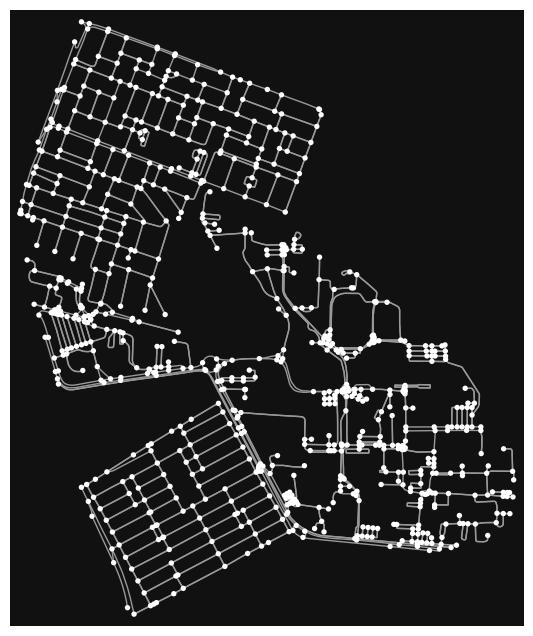

In [5]:
fig, ax = ox.plot_graph(G)

In [6]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

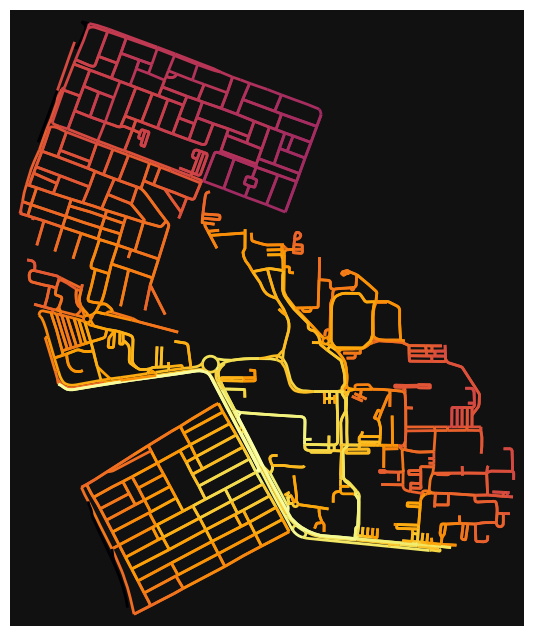

In [7]:
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [8]:
G_undirected = G.to_undirected()
G_simple = nx.Graph(G_undirected)

In [9]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=1000, tol=1e-06)

In [10]:
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')

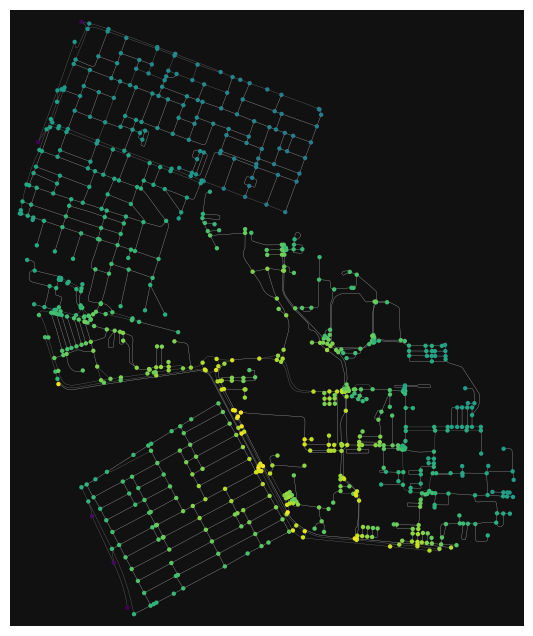

In [11]:
fig, ax = ox.plot_graph(G, node_color=[closeness_centrality[node] for node in G.nodes],
                        node_size=10, edge_linewidth=0.2, edge_color="gray")

In [13]:
top_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]

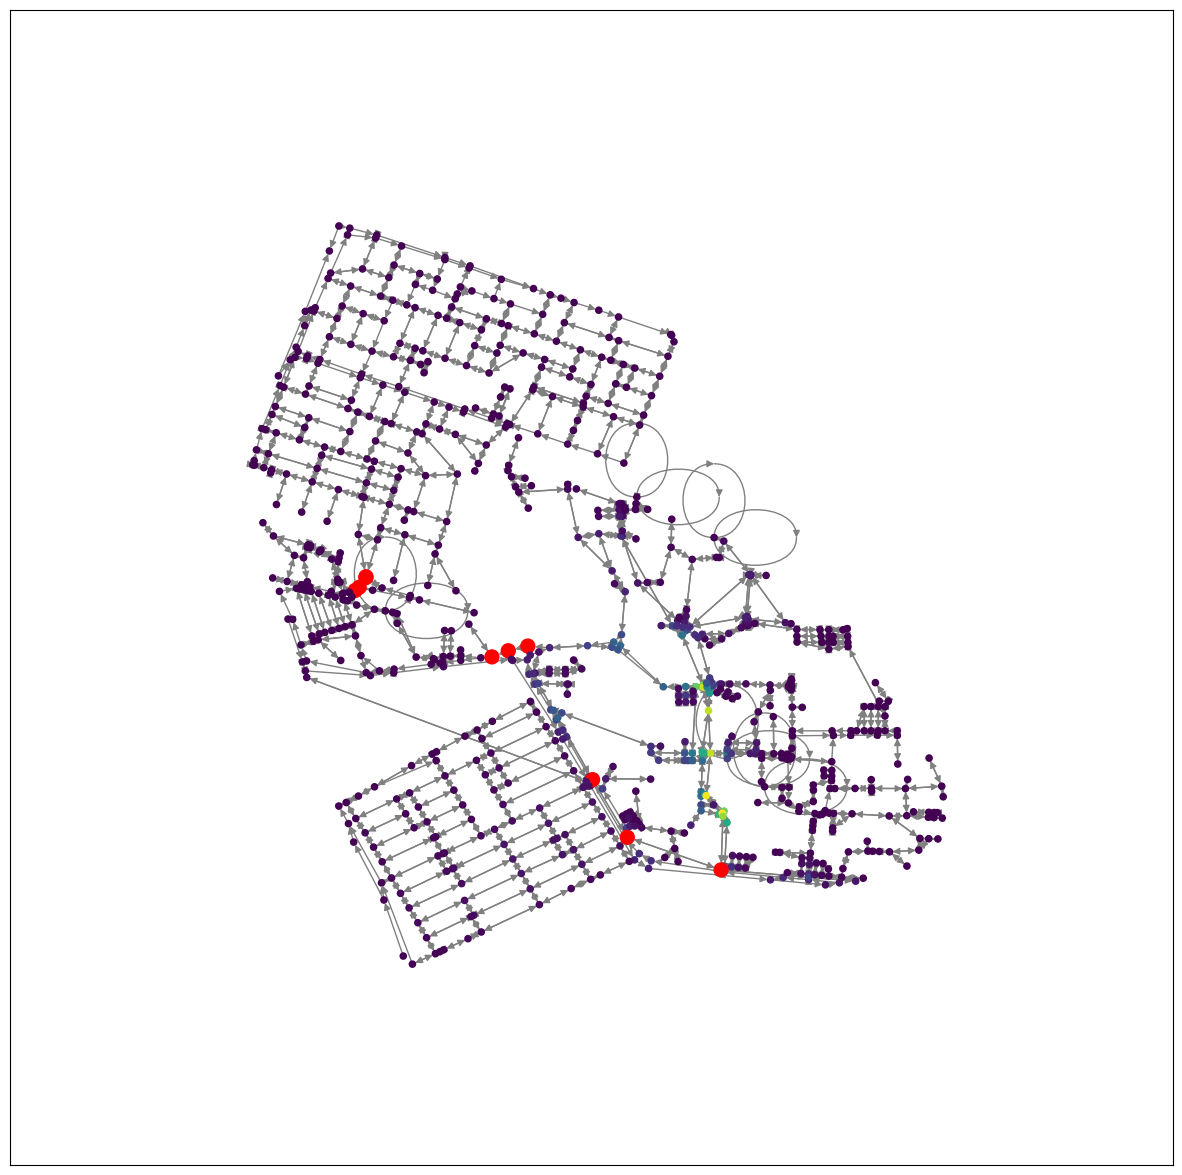

In [14]:
node_color = []
node_size = []

for node in G.nodes():
    if node in top_nodes:
        node_color.append('red')  # Destaque os top_nodes em vermelho
        node_size.append(100)  # Aumente o tamanho dos top_nodes
    else:
        # Map eigenvector centrality to a colormap instead of using raw values
        # Assuming 'viridis' colormap, you might need to adjust normalization
        norm = plt.Normalize(vmin=min(eigenvector_centrality.values()),
                            vmax=max(eigenvector_centrality.values()))
        node_color.append(plt.cm.viridis(norm(eigenvector_centrality[node])))
        node_size.append(20)  # Tamanho padrão para outros nós

plt.figure(figsize=(15, 15))
# Plotar o grafo destacando os top_nodes
nx.draw_networkx(
    G,
    pos=ox.graph_to_gdfs(G, nodes=True, edges=False).geometry.apply(lambda x: (x.x, x.y)).to_dict(),
    node_color=node_color,
    node_size=node_size,
    with_labels=False,
    edge_color="gray"
)
plt.show() # Add this line to display the plot if it is not showing up.

<Axes: xlabel='Degree', ylabel='Count'>

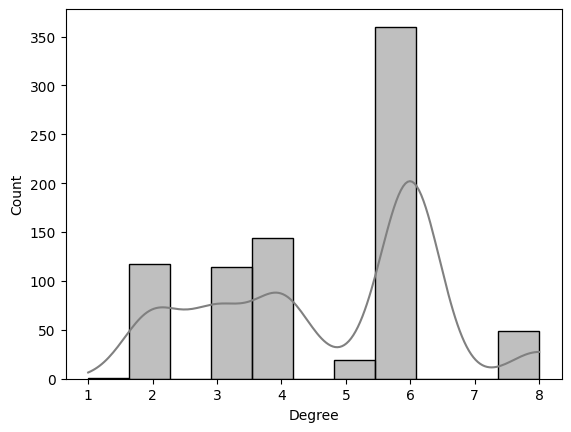

In [17]:
degrees = [val for (node, val) in G.degree()]
df = pd.DataFrame({"Degree": degrees})
sns.histplot(df["Degree"], kde=True, color="grey")

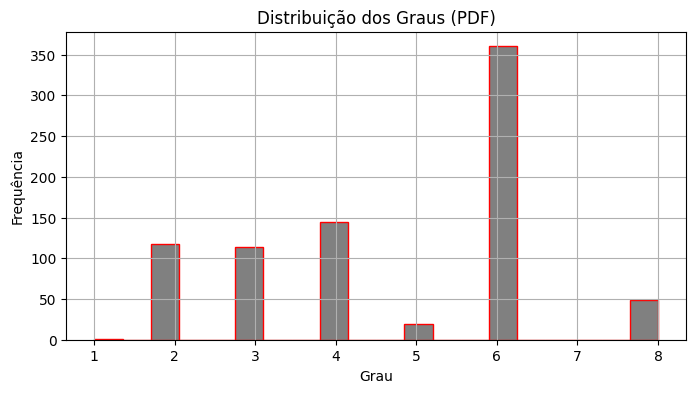

In [18]:
plt.figure(figsize=(8, 4))
plt.hist(degrees, bins=20, color='grey', edgecolor='red')
plt.title("Distribuição dos Graus (PDF)")
plt.xlabel("Grau")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

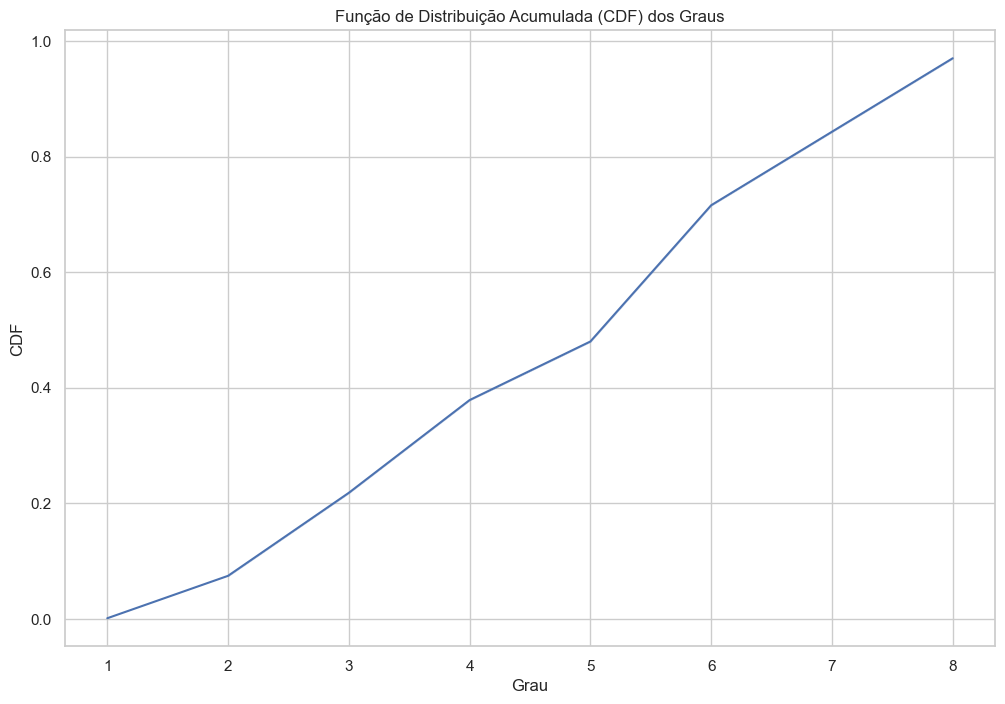

In [ ]:
df['Degree_CDF'] = df['Degree'].rank(pct=True)
sns.lineplot(x="Degree", y="Degree_CDF", data=df)
plt.title("Função de Distribuição Acumulada (CDF) dos Graus")
plt.xlabel("Grau")
plt.ylabel("CDF")
plt.show()

In [19]:
plt.rcParams["figure.figsize"] = [12, 8]
sns.set(style="whitegrid")

In [20]:
centrality_data = {
    'degree': list(degree_centrality.values()),
    'closeness': list(closeness_centrality.values()),
    'betweenness': list(betweenness_centrality.values()),
    'eigenvector': list(eigenvector_centrality.values())
}
centrality_df = pd.DataFrame(centrality_data)


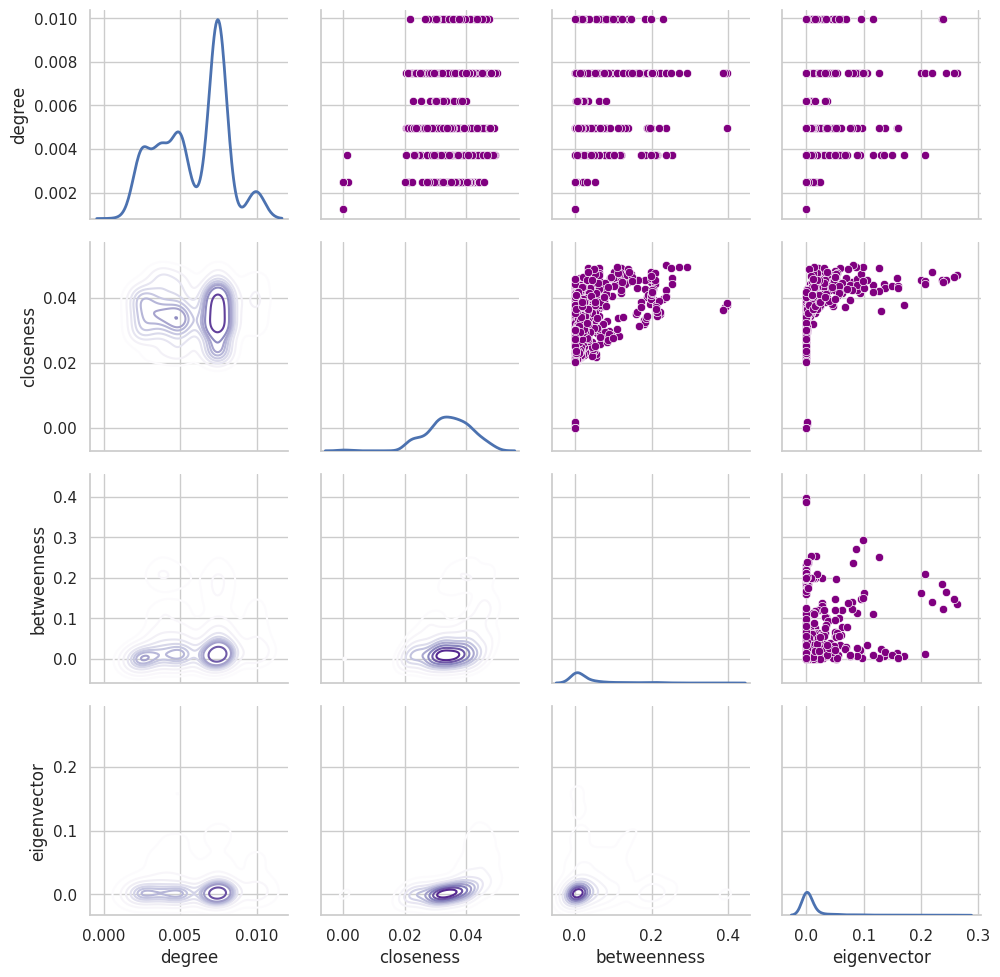

In [21]:
pair_grid = sns.PairGrid(centrality_df)
pair_grid.map_upper(sns.scatterplot, color="purple")
pair_grid.map_lower(sns.kdeplot, cmap="Purples")
pair_grid.map_diag(sns.kdeplot, lw=2)
plt.show()

In [24]:
import networkx as nx

# Converte MultiDiGraph para DiGraph
G_digraph = nx.DiGraph(G)

# Remove self-loops before calculating core numbers
G_digraph.remove_edges_from(nx.selfloop_edges(G_digraph))

# Agora calcula os números do núcleo usando o DiGraph sem self-loops
core_numbers = nx.core_number(G_digraph)
max_core = max(core_numbers.values())
core_nodes = [node for node, core in core_numbers.items() if core == max_core]
print(f"Nós no core máximo ({max_core}):", core_nodes)

Nós no core máximo (4): [500986119, 500986130, 500986137, 500986164, 501006390, 501006398, 501006547, 501013570, 501087462, 501118379, 501118420, 501118484, 501118503, 501118536, 501152572, 501152580, 501152617, 501286232, 501286371, 501834689, 501834691, 501834692, 501834693, 501834694, 501834695, 501834696, 501834697, 501834698, 501834699, 501834700, 501834701, 501834702, 501834704, 501834705, 501834707, 501834708, 501834710, 501834711, 501834713, 501834714, 501834715, 501834716, 501834719, 501834720, 501834721, 501834722, 501834724, 501834726, 501834727, 501834728, 501834729, 501834730, 501834732, 501834733, 501834734, 501834735, 501834736, 501834743, 501834746, 501834757, 501834758, 501834759, 501834760, 501834763, 501834764, 501834766, 501834767, 501834769, 501834775, 501834777, 501834780, 501834783, 501834784, 501834787, 501834788, 501834789, 503787944, 503787945, 503787946, 503787948, 503787949, 503787967, 503787968, 503787970, 503792705, 503792707, 503792711, 503792729, 5037927

/var/folders/b7/3l68p5_d49d9b9vz6q4z8h7m0000gn/T/ipykernel_31657/3422118636.py:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap="viridis"), label="Eigenvector Centrality")


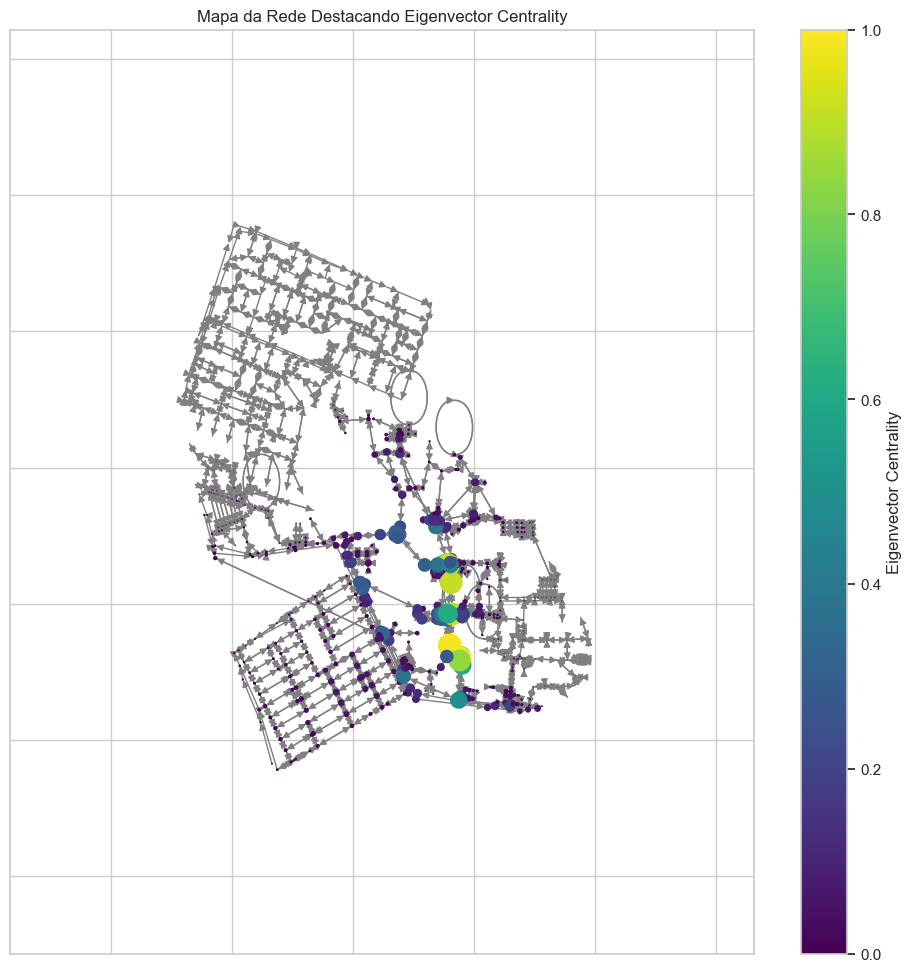

In [ ]:
node_color = [eigenvector_centrality[node] for node in G.nodes()]
node_size = [v * 1000 for v in eigenvector_centrality.values()]  # Aumenta o tamanho dos nós para visualização

plt.figure(figsize=(12, 12))
nx.draw_networkx(G, pos=ox.graph_to_gdfs(G, nodes=True, edges=False).geometry.apply(lambda x: (x.x, x.y)).to_dict(),
                 node_color=node_color, node_size=node_size, cmap='viridis', with_labels=False, edge_color="gray")
plt.colorbar(plt.cm.ScalarMappable(cmap="viridis"), label="Eigenvector Centrality")
plt.title("Mapa da Rede Destacando Eigenvector Centrality")
plt.show()